# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

**Solution:**

$$\frac{\exp(o_y + c)}{\sum_{y'} \exp(o_{y'} + c)} = \frac{\exp(o_y) \times \exp(c)}{\exp(c) \times \sum_{y'} \exp(o_{y'})} = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$  

<br>
2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

**Solution:**

$$p(y=1|o_{-1}=0, o_1=o) = \frac{exp(o_1)}{exp(o_{-1}) + exp(o_1)} = \frac{exp(o)}{exp(0) + exp(o)} = \frac{exp(o)}{1 + exp(o)} = \frac{1}{exp(-o) \times (1+exp(-o))} = \frac{1}{1 + exp(-o)}$$

<br>
3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

**Solution:**

$$p(y=-1|o) = 1 - p(y=1|o) = 1 - \frac{1}{1 + \exp(-o)} = \frac{\exp(-o)}{1 + \exp(-o)} = \frac{1}{1 + \exp(o)}$$

This and 1.2 give 

$$p(y|o) = \frac{1}{1 + \exp(-y \cdot o)}$$

Therefore, 

$$-\log p(y|o) = -log(\frac{1}{1 + \exp(-y \cdot o)}) = log(1 + \exp(-y \cdot o))$$

<br>
4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

**Solution:**

$$\lim_{o\rightarrow\infty}log(1 + \exp(-o)) = log(1+\lim_{o\rightarrow\infty}\exp(-o)) = log(1) = 0$$

$$\lim_{o\rightarrow-\infty}log(1 + \exp(-o)) = log(1+\lim_{o\rightarrow-\infty}\exp(-o)) = log(1+\lim_{o\rightarrow\infty}\exp(o)) = \infty$$

<br>

# 2. Implementing the logistic loss (1 point)


1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# the binary logistic loss
def binary_logistic_loss(y, o):
    return np.log(1 + np.exp(-y * o))


2. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.

In [ ]:
o = np.arange(-5, 5, 0.01)
loss_y_1 = binary_logistic_loss(1, o)
loss_y_neg_1 = binary_logistic_loss(-1, o)

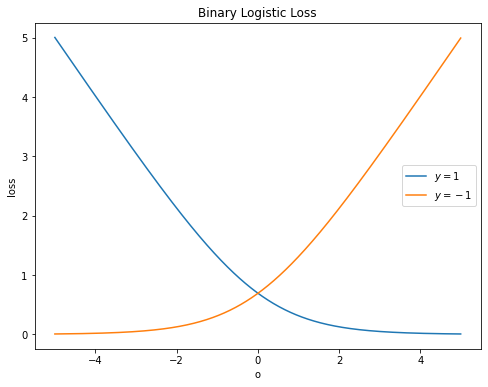

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Binary Logistic Loss')
plt.plot(o, loss_y_1, label = '$y = 1$')
plt.plot(o, loss_y_neg_1, label = '$y = -1$')
# plt.xlim(-5, 5)
plt.xlabel('o')
plt.ylabel('loss')
plt.legend()
plt.show()

3. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).

$$\frac{d l(y,o)}{d o} = \frac{1}{1+\exp(-y \cdot o))} \times \exp(-y \cdot o) \times (-y) = \frac{-y}{1 + \exp(y \cdot o)}$$

In [6]:
# derivative of binary logistic loss
def binary_logistic_loss_derivative(y, o):
    return (-y)/(1 + np.exp(y * o))


In [ ]:
o = np.arange(-5, 5, 0.01)
d_loss_y_1 = binary_logistic_loss_derivative(1, o)
d_loss_y_neg_1 = binary_logistic_loss_derivative(-1, o)


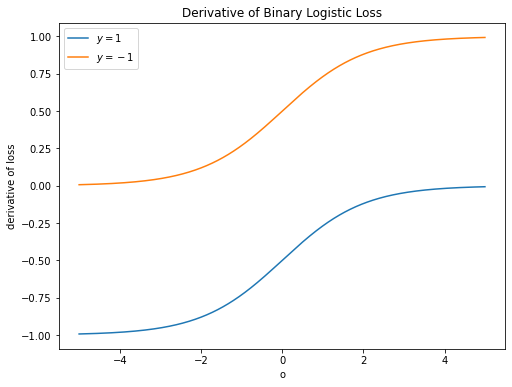

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Derivative of Binary Logistic Loss')
plt.plot(o, d_loss_y_1, label = '$y = 1$')
plt.plot(o, d_loss_y_neg_1, label = '$y = -1$')
# plt.xlim(-5, 5)
plt.xlabel('o')
plt.ylabel('derivative of loss')
plt.legend()
plt.show()

4. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [ ]:
o = np.arange(-1000, 1000, 0.1)
loss_y_1 = binary_logistic_loss(1, o)

<ipython-input-21-79bc8482774e>:3: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * o))


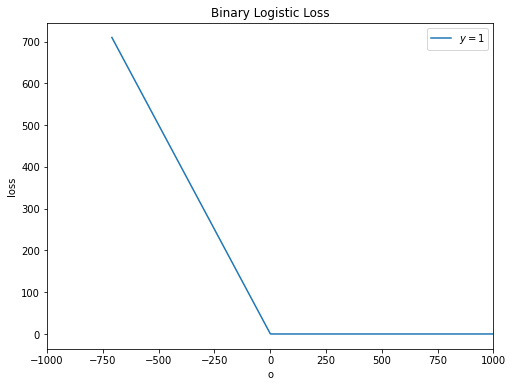

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Binary Logistic Loss')
plt.plot(o, loss_y_1, label = '$y = 1$')
# plt.plot(o, loss_y_neg_1, label = '$y = -1$')
plt.xlim(-1000, 1000)
plt.xlabel('o')
plt.ylabel('loss')
plt.legend()
plt.show()

When o is a large positive value, the loss is almost 0; when o is a large negative value, the loss is very large. This is because we have shown that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [7]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

In [8]:
x,y = generate_data()

In [ ]:
# binary logistic regression
def logistic_regression_model(x, m, b):
    o = m*x +b
    y = 1 / (1 + np.exp(-o))
    return y


In [17]:
# gradient descent
def gradient_descent(lr, loss_threshold, x, y):
    # initialize parameters
    m = 1
    b = 1
    loss = loss_threshold + 1
    loss_list = []
    # use loss to control the number of iterations
    while loss > loss_threshold:
        # o
        o = m*x + b
        # loss
        loss = binary_logistic_loss(y, o).sum() / len(x)
        loss_list.append(loss)
        # update the parameter
        d_m = (x * binary_logistic_loss_derivative(y, o)).sum() / len(x)
        d_b = (binary_logistic_loss_derivative(y, o)).sum() / len(x)
        m = m - d_m
        b = b - d_b
        
    return(loss_list, m, b)


In [34]:
lr = 0.01
loss_threshold = 0.00001
loss_list, m, b = gradient_descent(lr, loss_threshold, x, y)

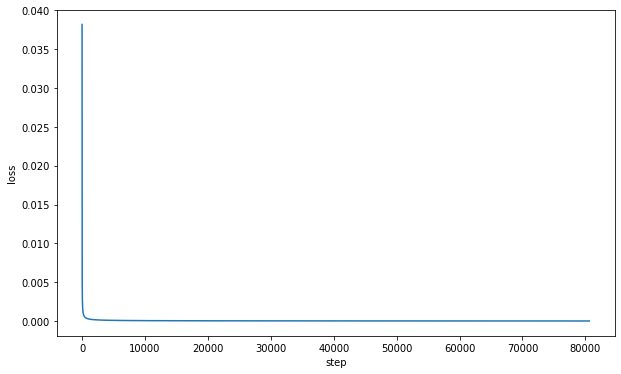

In [41]:
# plot the loss
plt.figure(figsize=(10, 6))
plt.plot(loss_list)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

I control the number of iterations during gradient descent by setting the threshold of loss. Here, I set the threshold of loss as 0.0001, that is, the loss after iteration is less than 0.0001, which is very close to 0.